In [1]:
import librosa
audio_data = '2.mp3'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1017792,) 22050


In [2]:
import IPython.display as ipd
ipd.Audio(audio_data)

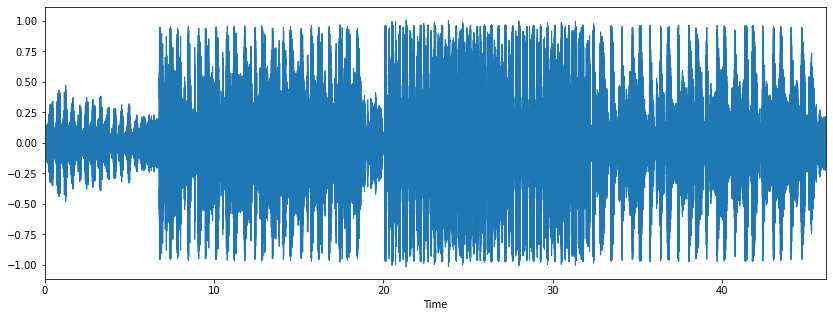

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

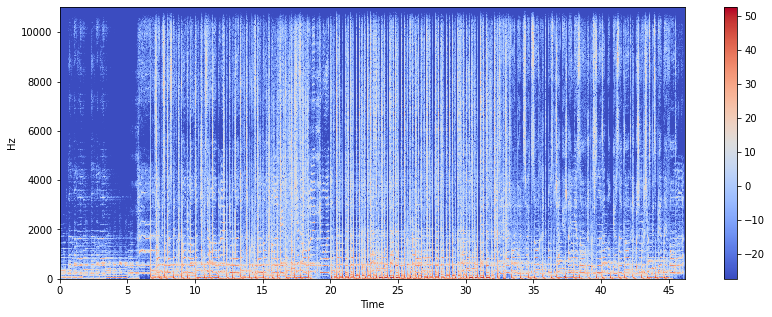

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


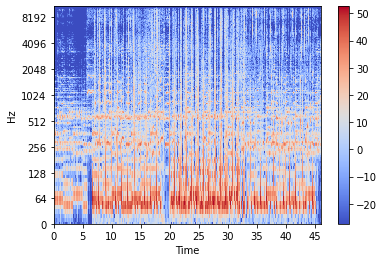

In [5]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/util/utils.py:724: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)


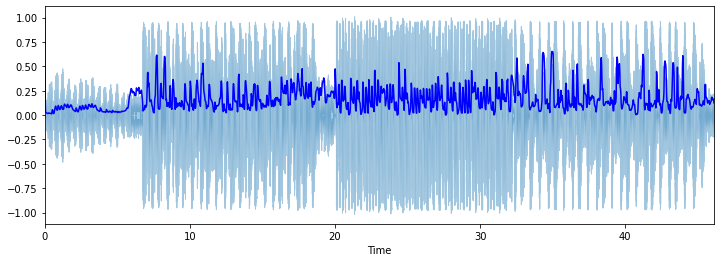

In [6]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

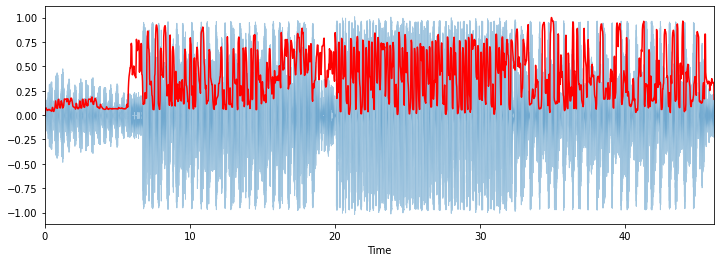

In [7]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/util/utils.py:724: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/util/utils.py:724: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np

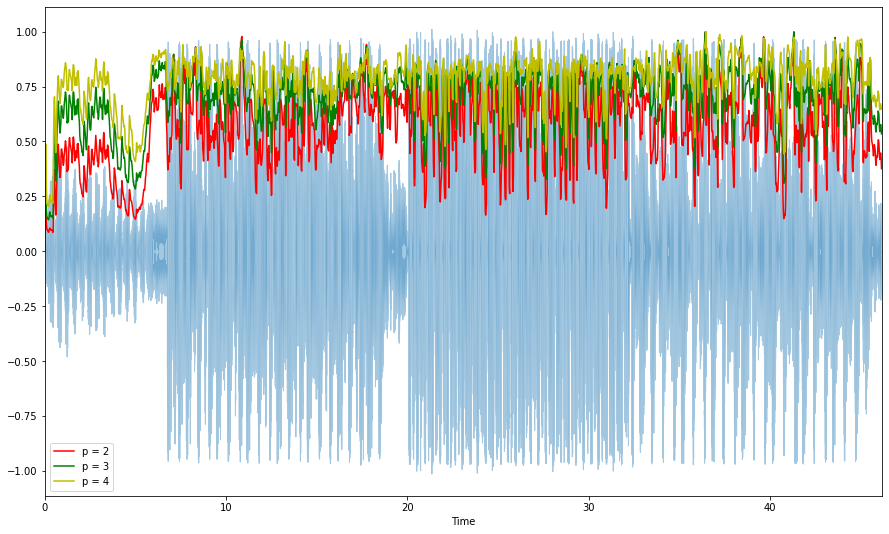

In [8]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/util/utils.py:826: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/util/utils.py:724: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/Users/macbook/PycharmProjects/VKR/venv/lib/python3.8/site-packages/librosa/uti

AttributeError: 'AxesSubplot' object has no attribute 'get_array'

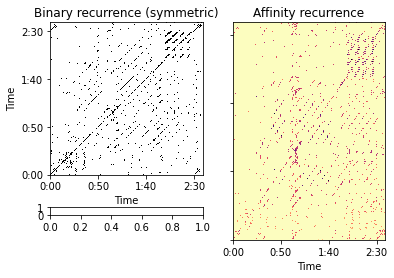

In [9]:
y, sr = librosa.load('1.mp3')
hop_length = 1024
chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
# Use time-delay embedding to get a cleaner recurrence matrix
chroma_stack = librosa.feature.stack_memory(chroma, n_steps=10, delay=3)
R = librosa.segment.recurrence_matrix(chroma_stack)
R_aff = librosa.segment.recurrence_matrix(chroma_stack, metric='cosine',
                                          mode='affinity')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
imgsim = librosa.display.specshow(R, x_axis='time', y_axis='time',
                         hop_length=hop_length, ax=ax[0])
ax[0].set(title='Binary recurrence (symmetric)')
imgaff = librosa.display.specshow(R_aff, x_axis='time', y_axis='time',
                         hop_length=hop_length, cmap='magma_r', ax=ax[1])
ax[1].set(title='Affinity recurrence')
ax[1].label_outer()
fig.colorbar(imgsim, ax=ax[0], orientation='horizontal', ticks=[0, 1])
fig.colorbar(imgaff, ax=ax[1], orientation='horizontal')

In [ ]:
import numpy as np
import librosa
import librosa.display

audio_data = '1.mp3'
y, sr = librosa.load(audio_data)
print(y.shape, sr)

tempo, beats = librosa.beat.beat_track(y=y, sr=sr, hop_length=512)
beat_times = librosa.frames_to_time(beats, sr=sr, hop_length=512)
cqt = np.abs(librosa.cqt(y, sr=sr, hop_length=512))
subseg = librosa.segment.subsegment(cqt, beats, n_segments=2)
subseg_t = librosa.frames_to_time(subseg, sr=sr, hop_length=512)
print(tempo, beats)
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# librosa.display.specshow(librosa.amplitude_to_db(cqt,
#                                                  ref=np.max),
#                          y_axis='cqt_hz', x_axis='time', ax=ax)
# lims = ax.get_ylim()
# ax.vlines(beat_times, lims[0], lims[1], color='lime', alpha=0.9,
#            linewidth=2, label='Beats')
# ax.vlines(subseg_t, lims[0], lims[1], color='linen', linestyle='--',
#            linewidth=1.5, alpha=0.5, label='Sub-beats')
# ax.legend()
# ax.set(title='CQT + Beat and sub-beat markers')